In [1]:
from ImagePreprocessing import *
import time
from sklearn import metrics


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
def get_prediction(model, filepath):
    image = io.imread(filepath)
    if len(image.shape) < 3:
        image = color.gray2rgb(image)
    if image.shape[2] == 4:
        image = color.rgba2rgb(image)
    image = transform.resize(image,(250,250))
    mytransform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])
    image = mytransform(image)
    data = torch.unsqueeze(image,0)
    output = model(data.float()) 
    output = output.detach().numpy()
    output = output.flatten()
    prediction = np.argmax(output)
    return prediction


In [3]:
tests_df = pd.read_csv('../data/processed_validate_labels.csv')
image_path = '../data/resized_val_images_250'
model_path = 'pretrained_resnet_model_epoch30_lr1_batchsize64'
model_name = model_path + '.pt'
model = initialize_model('resnet', 783, True, use_pretrained=True)
model.load_state_dict(torch.load(os.path.join(model_path, model_name)))
model.float()
model.eval()


N = len(tests_df.index)
predictions = np.zeros(N)
truths = np.zeros(N)
correct = 0

for i, row in tests_df.iterrows():
    if i % 100 == 0:
        print(i, time.time())
        print("Correct:",correct)
    image_id = row["hashed_id"]
    country = row["country"]
    continent = row["continent"]
    filename = "{}.jpg".format(image_id)
    filepath = os.path.join(image_path, filename)

    prediction = get_prediction(model, filepath)
    truth = row["Label"]
    correct += (prediction == truth)
    predictions[i] = prediction
    truths[i] = truth

print(acc)

0 1591222385.1765265
Correct: 0
100 1591222391.611694
Correct: 43
200 1591222398.0363781
Correct: 83
300 1591222404.4625974
Correct: 118
400 1591222410.8873107
Correct: 164
500 1591222417.3107378
Correct: 214
600 1591222423.7432199
Correct: 263
700 1591222430.1581137
Correct: 309
800 1591222436.569657
Correct: 356
900 1591222442.9989307
Correct: 401
1000 1591222449.4305344
Correct: 452
1100 1591222455.8521385
Correct: 496
1200 1591222462.2581778
Correct: 542
1300 1591222468.6795654
Correct: 581
1400 1591222475.097309
Correct: 628
1500 1591222481.5344033
Correct: 673
1600 1591222487.9412532
Correct: 721
1700 1591222494.3653016
Correct: 766
1800 1591222500.7822318
Correct: 815
1900 1591222507.2142892
Correct: 865
2000 1591222514.7808099
Correct: 911
2100 1591222521.2045588
Correct: 959
2200 1591222527.6365085
Correct: 1005
2300 1591222534.0678241
Correct: 1054
2400 1591222540.4976888
Correct: 1103
2500 1591222546.9263587
Correct: 1154
2600 1591222553.3572145
Correct: 1202
2700 1591222559

NameError: name 'acc' is not defined

In [64]:
### Get index of classes with ascending number of training data 
df = tests_df["Label"].value_counts()
labels = list(df.index)
idxlist = pd.DataFrame(np.array(df),index=labels)

### Create a confusion matrix
confusion_matrix = pd.DataFrame({idx:[0.0] for idx in labels}) 
for i in range(N):
    if truths[i] == predictions[i]:
        confusion_matrix.at[0,int(predictions[i])] += 1/idxlist.at[int(predictions[i]),0]

### Save the confusion matrix
#save_name = model_name+"_confusion_matrix.txt" 
#confusion_matrix.to_csv(os.path.join(model_path,save_name),confusion_matrix)
confusion_matrix

,713,668,525,168,549,486,17,229,366,481,...,370,402,426,442,230,222,474,150,490,779
0,0.663877,0.654991,0.448544,0.727451,0.624402,0.439153,0.727586,0.629344,0.685039,0.342629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


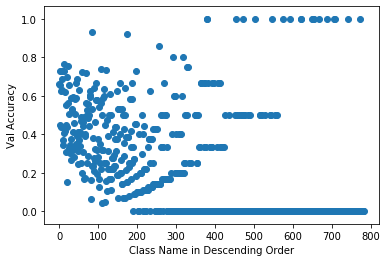

In [66]:
plt.scatter(range(783),np.array(confusion_matrix.iloc[0]))
plt.xlabel("Class Name in Descending Order")
plt.ylabel("Val Accuracy")
plt.show()